In [1]:
items = {
    "pizza": {"cost": 50, "calories": 300},
    "hamburger": {"cost": 40, "calories": 250},
    "hot-dog": {"cost": 30, "calories": 200},
    "pepsi": {"cost": 10, "calories": 100},
    "cola": {"cost": 15, "calories": 220},
    "potato": {"cost": 25, "calories": 350}
}

In [2]:
def greedy_algorithm(butget, items):
    result = []
    total_cost = 0
    total_calories = 0

    while total_cost < butget:
        max_cost = 0
        max_food = None

        for food, info in items.items():
            if food in result:
                continue

            if info["cost"] > max_cost and info["cost"] + total_cost <= butget:
                max_cost = info["cost"]
                max_food = food

        total_cost += max_cost
        total_calories += items[max_food]["calories"]
        result.append(max_food)

    return result, total_cost, total_calories

In [3]:
greedy_algorithm(100, items)

(['pizza', 'hamburger', 'pepsi'], 100, 650)

In [4]:
import matplotlib.pyplot as plt
import numpy as np


def visualize_dp(dp, num_items, budget):
    dp_matrix = np.zeros((num_items + 1, budget + 1))
    for item in range(num_items + 1):
        for cash in range(budget + 1):
            dp_matrix[item, cash] = dp[(item, cash)]
    
    plt.figure(figsize=(10, 8))
    plt.imshow(dp_matrix, cmap='Greens', aspect='auto')

    plt.colorbar(label='Calories')
    plt.xlabel('Budget')
    plt.ylabel('Items')
    plt.title('DP Table Visualization')
    plt.show()


def maximize_calories(budget, items, visualize=False):
    num_items = len(items)
    dp = np.zeros((num_items + 1, budget + 1), dtype=int)
    
    item_names = list(items.keys())
    
    for item_index in range(1, num_items + 1):
        item_name = item_names[item_index - 1]
        item_cost = items[item_name]["cost"]
        item_calories = items[item_name]["calories"]
        
        for current_budget in range(1, budget + 1):
            if item_cost > current_budget:
                dp[item_index, current_budget] = dp[item_index - 1, current_budget]
            else:
                without_item = dp[item_index - 1, current_budget]
                with_item = dp[item_index - 1, current_budget - item_cost] + item_calories
                dp[item_index, current_budget] = max(without_item, with_item)
    
    selected_items = []
    item_index = num_items
    current_budget = budget
    
    while item_index > 0 and current_budget > 0:
        if dp[item_index, current_budget] != dp[item_index - 1, current_budget]:
            item_name = item_names[item_index - 1]
            selected_items.append(item_name)
            current_budget -= items[item_name]["cost"]
        item_index -= 1

    max_calories = dp[num_items, budget]

    if visualize:
        print(f"Selected items: {selected_items}")
        print(f"Max calories: {max_calories}")
        visualize_dp(dp, num_items, budget)
    else:
        return selected_items, max_calories, dp

Selected items: ['potato', 'cola', 'hot-dog', 'hamburger']
Max calories: 1020


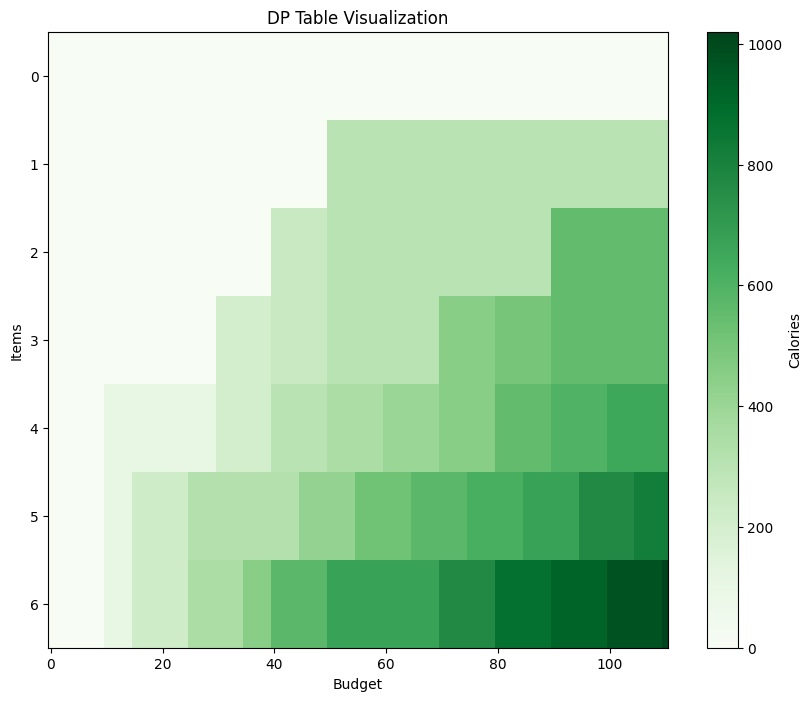

In [5]:
maximize_calories(110, items, visualize=True)